### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [2]:
import pandas as pd

# Lista dos arquivos das lojas
arquivos = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']
nomes_lojas = ['loja1', 'loja2', 'loja3', 'loja4']
faturamentos = {}

for nome, arquivo in zip(nomes_lojas, arquivos):
    df = pd.read_csv(arquivo)
    faturamentos[nome] = df['Preço'].sum()

# Exibindo o faturamento de cada loja
for loja, valor in faturamentos.items():
    print(f'Faturamento {loja}: R$ {valor:,.2f}')

Faturamento loja1: R$ 1,534,509.12
Faturamento loja2: R$ 1,488,459.06
Faturamento loja3: R$ 1,464,025.03
Faturamento loja4: R$ 1,384,497.58


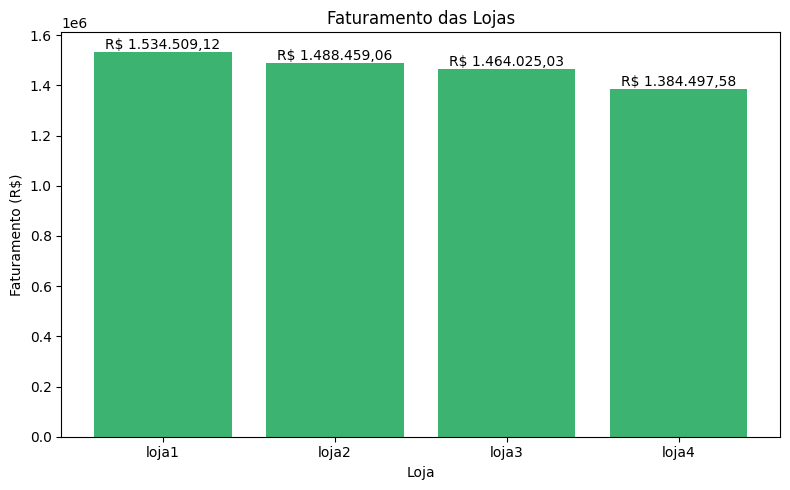

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

arquivos = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']
nomes_lojas = ['loja1', 'loja2', 'loja3', 'loja4']
faturamentos = {}

for nome, arquivo in zip(nomes_lojas, arquivos):
    df = pd.read_csv(arquivo)
    faturamentos[nome] = df['Preço'].sum()

# Gráfico de barras com faturamento de cada loja
plt.figure(figsize=(8, 5))
bars = plt.bar(faturamentos.keys(), faturamentos.values(), color='mediumseagreen')
plt.title('Faturamento das Lojas')
plt.xlabel('Loja')
plt.ylabel('Faturamento (R$)')
plt.tight_layout()

# Formata apresentação das barras com Valores no Topo
for bar, valor in zip(bars, faturamentos.values()):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'R$ {valor:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'),
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.show()

# 2. Vendas por Categoria


In [ ]:
import pandas as pd

# Carregando os dados das lojas
loja1 = pd.read_csv('loja_1.csv')
loja2 = pd.read_csv('loja_2.csv')
loja3 = pd.read_csv('loja_3.csv')
loja4 = pd.read_csv('loja_4.csv')

# Agrupando e somando por categoria para cada loja
cat_loja1 = loja1.groupby('Categoria do Produto')['Preço'].sum()
cat_loja2 = loja2.groupby('Categoria do Produto')['Preço'].sum()
cat_loja3 = loja3.groupby('Categoria do Produto')['Preço'].sum()
cat_loja4 = loja4.groupby('Categoria do Produto')['Preço'].sum()

# Unindo os resultados em um único DataFrame
df_categorias = pd.DataFrame({
    'loja1': cat_loja1,
    'loja2': cat_loja2,
    'loja3': cat_loja3,
    'loja4': cat_loja4
}).fillna(0)

# Ordenando pelo total de vendas (opcional)
df_categorias['Total'] = df_categorias.sum(axis=1)
df_categorias = df_categorias.sort_values('Total', ascending=False)
df_categorias = df_categorias.drop(columns='Total')

# Exibindo o resultado
df_categorias = df_categorias.applymap(lambda x: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))
display(df_categorias)

# 3. Média de Avaliação das Lojas

# 4. Produtos Mais e Menos Vendidos

# 5. Frete Médio por Loja
